In [1]:
# Environment
import pandas as pd
print('pandas: %s' % pd.__version__)
import numpy as np
print('numpy: %s' % np.__version__)
import scipy
print('scipy: %s' % scipy.__version__)
#data visualization
import matplotlib
print('matplotlib: %s' % matplotlib.__version__)
#scikit learn
import sklearn
print('sklearn: %s' % sklearn.__version__)
# statsmodels
import statsmodels
print('statsmodels: %s' % statsmodels.__version__)

pandas: 0.22.0
numpy: 1.14.0
scipy: 1.0.0
matplotlib: 2.1.2
sklearn: 0.19.1
statsmodels: 0.8.0


# Problem Description

The problem is to predict the number of monthly sales of champagne for the Perrin Freres .
The dataset provides the number of monthly sales of champagne from January 1964 to September 1972, or just under 10 years of data.
Number of observations = 150

In [2]:
df_sales = pd.read_csv('C:\\Users\\Plaban_Nayak\\Desktop\\TimeSeries\\monthly-champagne-sales.csv')

In [3]:
df_sales.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


# Test Harness
We must develop a test harness to investigate the data and evaluate candidate models.

This involves two steps:

Defining a Validation Dataset.
Developing a Method for Model Evaluation.

In [6]:
marks= [90,90,90,90]
print("".join(map(str,marks)))

90909090


# Validation Dataset
The dataset is not current. This means that we cannot easily collect updated data to validate the model.

Therefore we will pretend that it is September 1971 and withhold the last one year of data from analysis and model selection.

This final year of data will be used to validate the final model.

In [76]:
series1 = pd.Series.from_csv('C:\\Users\\Plaban_Nayak\\Desktop\\TimeSeries\\monthly-champagne-sales.csv', header=0)

D:\Users\Plaban_Nayak\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


In [90]:
series1

Month
1964-01                                                    2815.0
1964-02                                                    2672.0
1964-03                                                    2755.0
1964-04                                                    2721.0
1964-05                                                    2946.0
1964-06                                                    3036.0
1964-07                                                    2282.0
1964-08                                                    2212.0
1964-09                                                    2922.0
1964-10                                                    4301.0
1964-11                                                    5764.0
1964-12                                                    7312.0
1965-01                                                    2541.0
1965-02                                                    2475.0
1965-03                                                    3031.0
1965

In [106]:
dataset = np.asarray(series1)

In [109]:
dataset = dataset[~np.isnan(dataset)]
dataset

array([ 2815.,  2672.,  2755.,  2721.,  2946.,  3036.,  2282.,  2212.,
        2922.,  4301.,  5764.,  7312.,  2541.,  2475.,  3031.,  3266.,
        3776.,  3230.,  3028.,  1759.,  3595.,  4474.,  6838.,  8357.,
        3113.,  3006.,  4047.,  3523.,  3937.,  3986.,  3260.,  1573.,
        3528.,  5211.,  7614.,  9254.,  5375.,  3088.,  3718.,  4514.,
        4520.,  4539.,  3663.,  1643.,  4739.,  5428.,  8314., 10651.,
        3633.,  4292.,  4154.,  4121.,  4647.,  4753.,  3965.,  1723.,
        5048.,  6922.,  9858., 11331.,  4016.,  3957.,  4510.,  4276.,
        4968.,  4677.,  3523.,  1821.,  5222.,  6872., 10803., 13916.,
        2639.,  2899.,  3370.,  3740.,  2927.,  3986.,  4217.,  1738.,
        5221.,  6424.,  9842., 13076.,  3934.,  3162.,  4286.,  4676.,
        5010.,  4874.,  4633.,  1659.,  5951.,  6981.,  9851., 12670.,
        4348.,  3564.,  4577.,  4788.,  4618.,  5312.,  4298.,  1413.,
        5877.])

In [110]:
len(dataset)

105

In [115]:
X = series1.value
X

array([ 2815.,  2672.,  2755.,  2721.,  2946.,  3036.,  2282.,  2212.,
        2922.,  4301.,  5764.,  7312.,  2541.,  2475.,  3031.,  3266.,
        3776.,  3230.,  3028.,  1759.,  3595.,  4474.,  6838.,  8357.,
        3113.,  3006.,  4047.,  3523.,  3937.,  3986.,  3260.,  1573.,
        3528.,  5211.,  7614.,  9254.,  5375.,  3088.,  3718.,  4514.,
        4520.,  4539.,  3663.,  1643.,  4739.,  5428.,  8314., 10651.,
        3633.,  4292.,  4154.,  4121.,  4647.,  4753.,  3965.,  1723.,
        5048.,  6922.,  9858., 11331.,  4016.,  3957.,  4510.,  4276.,
        4968.,  4677.,  3523.,  1821.,  5222.,  6872., 10803., 13916.,
        2639.,  2899.,  3370.,  3740.,  2927.,  3986.,  4217.,  1738.,
        5221.,  6424.,  9842., 13076.,  3934.,  3162.,  4286.,  4676.,
        5010.,  4874.,  4633.,  1659.,  5951.,  6981.,  9851., 12670.,
        4348.,  3564.,  4577.,  4788.,  4618.,  5312.,  4298.,  1413.,
        5877.,    nan])

Once fit, we can use the model to make a prediction by calling the predict() function for a number of observations in the future. This creates 1 7-day forecas

In [116]:
# split dataset
train, test = dataset[1:len(dataset)-7], dataset[len(dataset)-7:]

In [117]:
train

array([ 2672.,  2755.,  2721.,  2946.,  3036.,  2282.,  2212.,  2922.,
        4301.,  5764.,  7312.,  2541.,  2475.,  3031.,  3266.,  3776.,
        3230.,  3028.,  1759.,  3595.,  4474.,  6838.,  8357.,  3113.,
        3006.,  4047.,  3523.,  3937.,  3986.,  3260.,  1573.,  3528.,
        5211.,  7614.,  9254.,  5375.,  3088.,  3718.,  4514.,  4520.,
        4539.,  3663.,  1643.,  4739.,  5428.,  8314., 10651.,  3633.,
        4292.,  4154.,  4121.,  4647.,  4753.,  3965.,  1723.,  5048.,
        6922.,  9858., 11331.,  4016.,  3957.,  4510.,  4276.,  4968.,
        4677.,  3523.,  1821.,  5222.,  6872., 10803., 13916.,  2639.,
        2899.,  3370.,  3740.,  2927.,  3986.,  4217.,  1738.,  5221.,
        6424.,  9842., 13076.,  3934.,  3162.,  4286.,  4676.,  5010.,
        4874.,  4633.,  1659.,  5951.,  6981.,  9851., 12670.,  4348.,
        3564.])

In [118]:
test

array([4577., 4788., 4618., 5312., 4298., 1413., 5877.])

# Auto Regressive Model using statsmodels library

In [119]:
from statsmodels.tsa.ar_model import AR
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

Lag: 12
Coefficients: [ 1.44188884e+03  1.01744031e-01 -1.04077589e-01  4.23470082e-02
 -1.16930008e-01  5.87167409e-02 -9.06855673e-02  7.01207518e-02
 -1.35531154e-01  7.00486460e-02 -7.78983338e-02  5.51447507e-02
  8.90849482e-01]


In [120]:
predictions

array([4122.46472382, 4717.54543353, 5156.13160207, 4969.38215431,
       4741.0957225 , 1532.67612872, 6082.24200573])

In [123]:
import matplotlib.pyplot as plt

predicted=4122.464724, expected=4577.000000
predicted=4717.545434, expected=4788.000000
predicted=5156.131602, expected=4618.000000
predicted=4969.382154, expected=5312.000000
predicted=4741.095722, expected=4298.000000
predicted=1532.676129, expected=1413.000000
predicted=6082.242006, expected=5877.000000
Test MSE: 124474.178


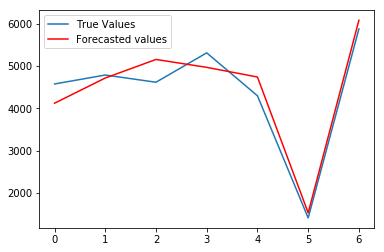

In [125]:
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot results
plt.plot(test,label='True Values')
plt.plot(predictions, color='red',label='Forecasted values')
plt.legend()
plt.show()

In [21]:
series = df_sales.copy()

In [23]:
series.set_index('Month').head()

,Perrin Freres monthly champagne sales millions ?64-?72
Month,
1964-01,2815.0
1964-02,2672.0
1964-03,2755.0
1964-04,2721.0
1964-05,2946.0


In [26]:
len(series)

106

In [24]:
split_point = len(series) - 12

In [25]:
split_point

94

In [27]:
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('C:\\Users\\Plaban_Nayak\\Desktop\\TimeSeries\\dataset.csv')
validation.to_csv('C:\\Users\\Plaban_Nayak\\Desktop\\TimeSeries\\validation.csv')

Dataset 94, Validation 12


The specific contents of these files are:

dataset.csv: Observations from January 1964 to September 1971 (93 observations)
    
validation.csv: Observations from October 1971 to September 1972 (12 observations)
    
The validation dataset is about 11% of the original dataset.

In [64]:
index1 = 10
index2 = 50
for num in range(index1,index2 +1):
    if num > 1:
        #print(num)
        isDivisibile = False;
        for i in range(2,num):
            #print(i,num,isDivisibile)
            if num % i == 0:
                #print(num)
                isDivisibile = True;
                #print(i,num,isDivisibile)
        if not isDivisibile :
            print('Prime Number : ',num);
                
            

Prime Number :  11
Prime Number :  13
Prime Number :  17
Prime Number :  19
Prime Number :  23
Prime Number :  29
Prime Number :  31
Prime Number :  37
Prime Number :  41
Prime Number :  43
Prime Number :  47


# Model Evaluation
Model evaluation will only be performed on the data in dataset.csv prepared in the previous section.

Model evaluation involves two elements:

1. Performance Measure.
2. Test Strategy.

Performance Measure:
    
    We will evaluate the performance of predictions using the root mean squared error (RMSE). This will give more weight to predictions that are grossly wrong and will have the same units as the original data.

Any transforms to the data must be reversed before the RMSE is calculated and reported to make the performance between different methods directly comparable.

We can calculate the RMSE using the helper function from the scikit-learn library mean_squared_error() that calculates the mean squared error between a list of expected values (the test set) and the list of predictions. We can then take the square root of this value to give us an RMSE score.


Test Strategy


Candidate models will be evaluated using walk-forward validation.

This is because a rolling-forecast type model is required from the problem definition. This is where one-step forecasts are needed given all available data.

The walk-forward validation will work as follows:

The first 50% of the dataset will be held back to train the model.
The remaining 50% of the dataset will be iterated and test the model.
For each step in the test dataset:
A model will be trained.
A one-step prediction made and the prediction stored for later evaluation.
The actual observation from the test dataset will be added to the training dataset for the next iteration.
The predictions made during the iteration of the test dataset will be evaluated and an RMSE score reported.
Given the small size of the data, we will allow a model to be re-trained given all available data prior to each prediction.

# Persistence


The first step before getting bogged down in data analysis and modeling is to establish a baseline of performance.

This will provide both a template for evaluating models using the proposed test harness and a performance measure by which all more elaborate predictive models can be compared.

The baseline prediction for time series forecasting is called the naive forecast, or persistence.

This is where the observation from the previous time step is used as the prediction for the observation at the next time step.

In [73]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# load data
series_dataset = pd.read_csv('C:\\Users\\Plaban_Nayak\\Desktop\\TimeSeries\\dataset.csv')
series_dataset.reset_index()
series_dataset = series_dataset.set_index('Month')
# prepare data
X = series_dataset.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    print("history : ",history[-1])
    yhat = history[-1]
    predictions.append(yhat)
    # observation
    obs = test[i]
    print("obs : ",obs)
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat[0], obs[0]))
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)



history :  [  46. 8314.]
obs :  [   47. 10651.]
>Predicted=46.000, Expected= 47
history :  [   47. 10651.]
obs :  [  48. 3633.]
>Predicted=47.000, Expected= 48
history :  [  48. 3633.]
obs :  [  49. 4292.]
>Predicted=48.000, Expected= 49
history :  [  49. 4292.]
obs :  [  50. 4154.]
>Predicted=49.000, Expected= 50
history :  [  50. 4154.]
obs :  [  51. 4121.]
>Predicted=50.000, Expected= 51
history :  [  51. 4121.]
obs :  [  52. 4647.]
>Predicted=51.000, Expected= 52
history :  [  52. 4647.]
obs :  [  53. 4753.]
>Predicted=52.000, Expected= 53
history :  [  53. 4753.]
obs :  [  54. 3965.]
>Predicted=53.000, Expected= 54
history :  [  54. 3965.]
obs :  [  55. 1723.]
>Predicted=54.000, Expected= 55
history :  [  55. 1723.]
obs :  [  56. 5048.]
>Predicted=55.000, Expected= 56
history :  [  56. 5048.]
obs :  [  57. 6922.]
>Predicted=56.000, Expected= 57
history :  [  57. 6922.]
obs :  [  58. 9858.]
>Predicted=57.000, Expected= 58
history :  [  58. 9858.]
obs :  [   59. 11331.]
>Predicted=5

# Data Analysis

We can use summary statistics and plots of the data to quickly learn more about the structure of the prediction problem.

In this section, we will look at the data from five perspectives:

1. Summary Statistics.

2. Line Plot.

3. Seasonal Line Plots

4. Density Plots.

5. Box and Whisker Plot.

# Summary Statistics

Summary statistics provide a quick look at the limits of observed values. It can help to get a quick idea of what we are working with.

In [75]:
print(series_dataset['Perrin Freres monthly champagne sales millions ?64-?72'].describe())

count       94.000000
mean      4666.010638
std       2484.748262
min       1573.000000
25%       3049.000000
50%       4031.500000
75%       5170.250000
max      13916.000000
Name: Perrin Freres monthly champagne sales millions ?64-?72, dtype: float64


Some observations from these statistics include:

The number of observations (count) matches our expectation, meaning we are handling the data correctly.

The mean is about 4,666, which we might consider our level in this series.

The standard deviation (average spread from the mean) is relatively large at 2,484 sales.

The percentiles along with the standard deviation do suggest a large spread to the data.